In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
def kmeans_image(image_path, num_clusters):
    # 读取图像
    img = cv2.imread(image_path)  # 使用 OpenCV 读取图像，返回 BGR 格式的数组
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 将 BGR 转换为 RGB 格式，便于 Matplotlib 显示

    # 将图像转换为一维数组
    # 这里将原图像的形状 (height, width, 3) 转换为二维数组 (height * width, 3)
    # 每一行表示一个像素点的 RGB 值
    pixels = img.reshape((-1, 3))
        
    # 使用 K-Means 进行聚类
    kmeans = KMeans(n_clusters=num_clusters)  # 创建 K-Means 模型，设置聚类数为 num_clusters
    kmeans.fit(pixels)  # 对图像像素进行聚类训练

    # 获取聚类中心
    center = np.array(kmeans.cluster_centers_, dtype=np.uint8)  # 聚类中心表示主要颜色，将其转换为整数

    # 将每个像素分配到最近的聚类中心
    # 使用聚类中心替换每个像素的颜色
    segemented_img = center[kmeans.labels_].reshape(img.shape)  # 将一维像素还原为原图形状

    # # 显示原始图像和聚类结果
    # plt.figure(figsize=(10, 10))  # 设置画布大小为 10x10
    # plt.subplot(1, 2, 1)  # 创建 1 行 2 列的子图，激活第 1 个子图
    # plt.imshow(img)  # 显示原始图像
    # plt.title('Original Image')  # 设置标题

    # plt.subplot(1, 2, 2)  # 激活第 2 个子图
    plt.imshow(segemented_img)  # 显示 K-Means 聚类后的图像
    plt.title('K-Means Image')  # 设置标题

    plt.show()  # 显示两个子图


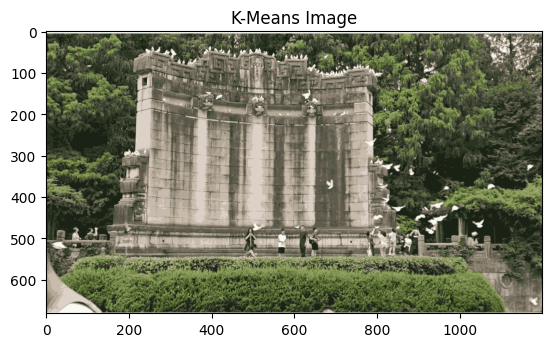

In [ ]:
image_path = '../../data/k-means/4.jpg' # 图片路径
num_cluster = 16                      # 聚类系数
kmeans_image(image_path,num_cluster) # 调用函数，输出图像